<a href="https://colab.research.google.com/github/KayalvizhiT513/Gradient_Descent_Comparison/blob/main/Gradient_Descent_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing necessary libraries:


In [59]:
import numpy as np
import csv
import random
import matplotlib.pyplot as plt

##Data Loading and Preprocessing:
<b>genfromtxt():</b>
* A numpy function for loading data from text files, especially when dealing with tabular data that has rows and columns.
* Return a Numpy array

In [2]:
# Load data from CSV file
data = np.genfromtxt('/content/drive/My Drive/ex1data2.txt', delimiter=',')

# Extract X and Y from the loaded data
X = data[:, :2].T  # Assuming the first two column is X
Y = data[:, 2]  # Assuming the third column is Y


In [4]:
data.shape

(47, 3)

In [5]:
X[0][:5]

array([2104., 1600., 2400., 1416., 3000.])

In [6]:
X[1][:5]

array([3., 3., 3., 2., 4.])

In [7]:
Y[:6]

array([399900., 329900., 369000., 232000., 539900., 299900.])

2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900
1985,4,299900


##Plotting Area VS Price by keeping Number of Bedrooms as constant

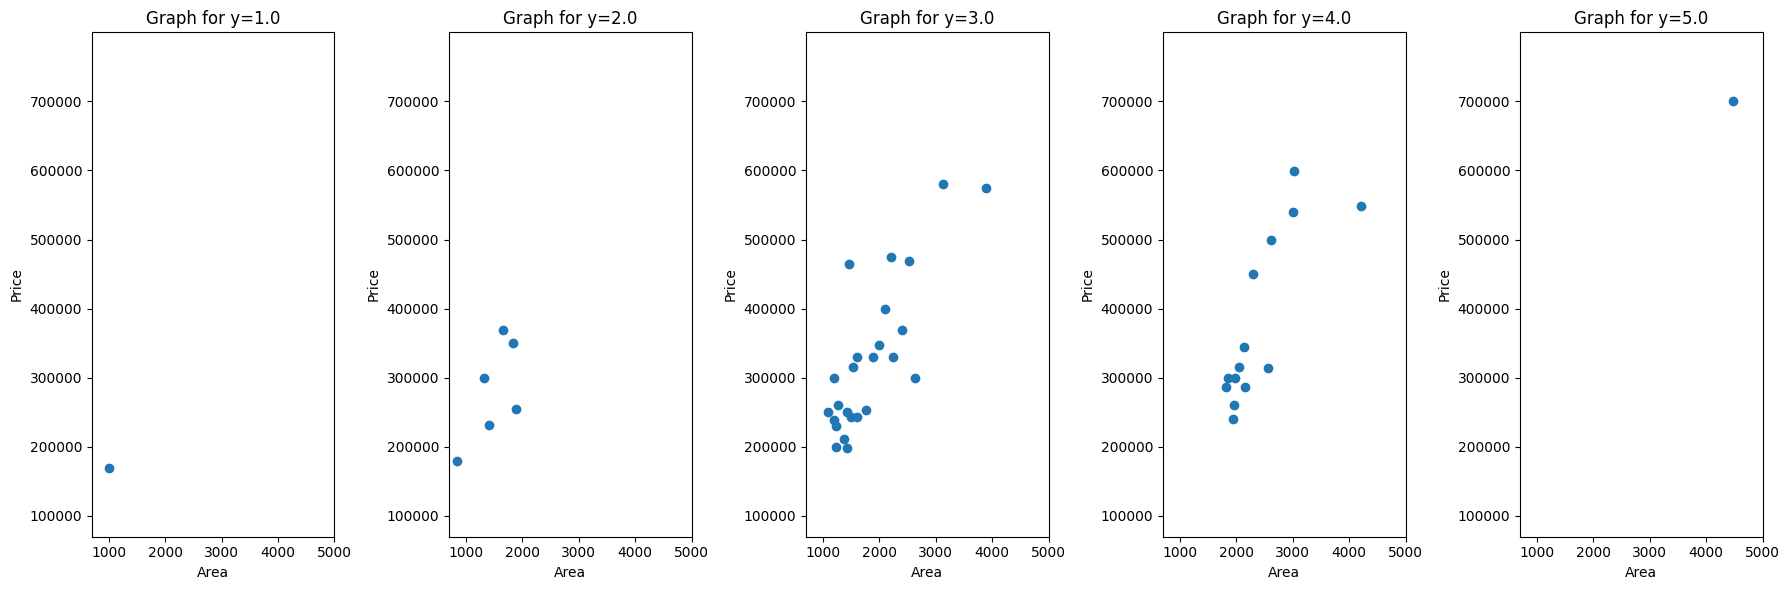

In [39]:
# Extracting unique y values
unique_y_values = np.unique(data[:, 1])

# Plotting
fig, axs = plt.subplots(1, len(unique_y_values), figsize=(18, 6))

for i, y_val in enumerate(unique_y_values):
    # Filter data for each unique y value
    subset_data = data[data[:, 1] == y_val]

    # Extracting x, z values
    x_values = subset_data[:, 0]
    z_values = subset_data[:, 2]

    # Plotting
    ax = axs[i]
    ax.scatter(x_values, z_values)
    ax.set_title(f'Graph for y={y_val}')
    ax.set_xlabel('Area')
    ax.set_ylabel('Price')
    ax.set_xlim([700, 5000])
    ax.set_ylim([min(Y)-1e5, max(Y)+1e5])

plt.tight_layout()
plt.show()


##Plotting No. of Bedrooms VS Price by bucketing Area (with interval of 200)

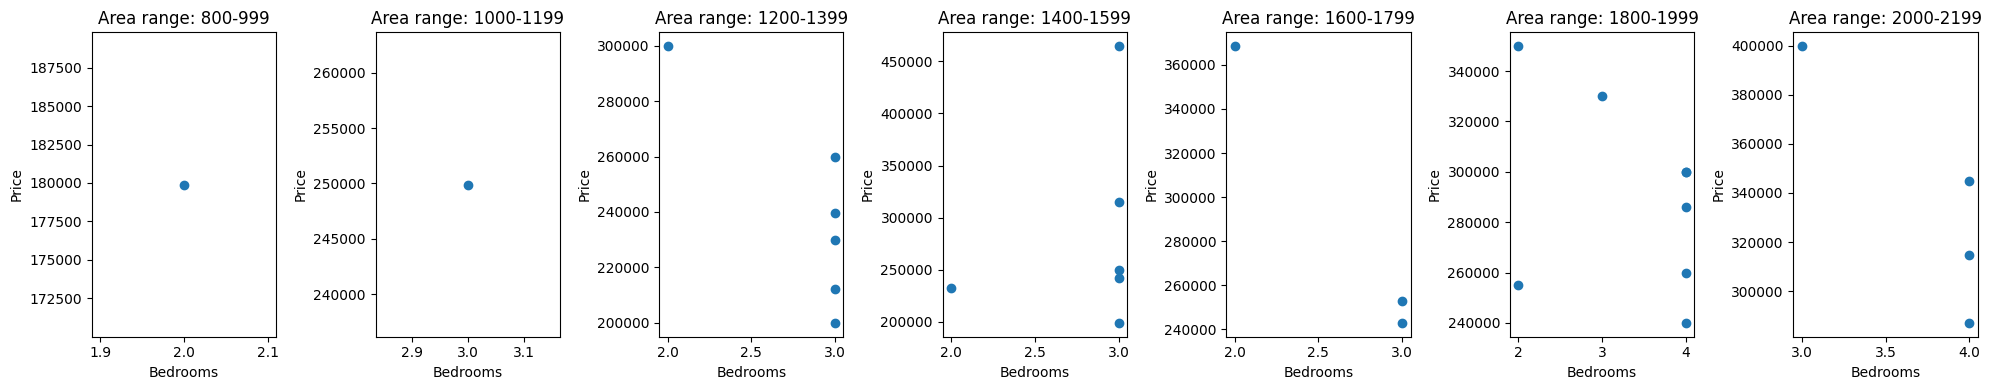

In [57]:
# Define x ranges
x_ranges = [(800 + i*200, 999 + i*200) for i in range(7)]

# Plotting
fig, axs = plt.subplots(1, len(x_ranges), figsize=(20, 4))

for i, x_range in enumerate(x_ranges):
    # Filter data for each x range
    subset_data = data[(data[:, 0] > x_range[0]) & (data[:, 0] <= x_range[1])]

    # Extracting y, z values
    y_values = subset_data[:, 1]
    z_values = subset_data[:, 2]

    # Plotting
    ax = axs[i]
    ax.scatter(y_values, z_values)
    ax.set_title(f'Area range: {x_range[0]}-{x_range[1]}')
    ax.set_xlabel('Bedrooms')
    ax.set_ylabel('Price')
    # ax.set_xlim([-1,7])
    # ax.set_ylim([min(Y)-1e5, max(Y)+1e5])

plt.tight_layout()
plt.show()


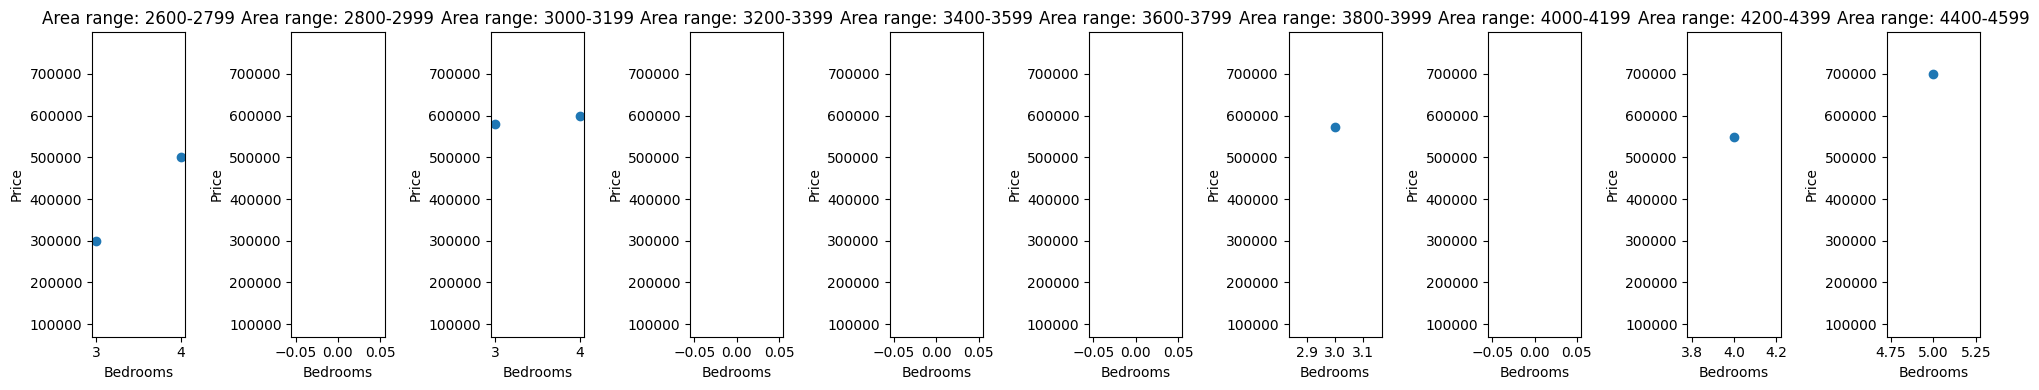

In [56]:
# Define x ranges
x_ranges = [(800 + i*200, 999 + i*200) for i in range(9,19)]

# Plotting
fig, axs = plt.subplots(1, len(x_ranges), figsize=(20, 4))

for i, x_range in enumerate(x_ranges):
    # Filter data for each x range
    subset_data = data[(data[:, 0] > x_range[0]) & (data[:, 0] <= x_range[1])]

    # Extracting y, z values
    y_values = subset_data[:, 1]
    z_values = subset_data[:, 2]

    # Plotting
    ax = axs[i]
    ax.scatter(y_values, z_values)
    ax.set_title(f'Area range: {x_range[0]}-{x_range[1]}')
    ax.set_xlabel('Bedrooms')
    ax.set_ylabel('Price')
    # ax.set_xlim([-1,7])
    ax.set_ylim([min(Y)-1e5, max(Y)+1e5])

plt.tight_layout()
plt.show()


## Normalizing the Features X[0] & X[1]:
  > Normalization ensures fairness among features by scaling their values to have a consistent impact on the model's optimization process. It prevents features with larger numerical magnitudes from dominating the optimization solely based on scale. By standardizing features to have a mean of 0 and a standard deviation of 1, normalization ensures equitable treatment, enabling each feature to contribute proportionately to the model's performance, regardless of its original scale.





In [10]:
def normalize_list(lst):
    """
    Normalize a list by scaling its values to have a mean of 0 and a standard deviation of 1.

    Parameters:
    lst (list): The list to be normalized.

    Returns:
    list: The normalized list.
    """
    if len(lst) == 0:
        return lst

    mean = sum(lst) / len(lst)
    variance = sum((x - mean) ** 2 for x in lst) / len(lst)
    std_dev = variance ** 0.5

    normalized_lst = [(x - mean) / std_dev for x in lst]

    return np.array(normalized_lst)

In [11]:
norm_X0 = normalize_list(X[0])
norm_X1 = normalize_list(X[1])

In [12]:
print(norm_X0[:6], norm_X1[:6], sep='\n')

[ 0.13141542 -0.5096407   0.5079087  -0.74367706  1.27107075 -0.01994505]
[-0.22609337 -0.22609337 -0.22609337 -1.5543919   1.10220517  1.10220517]


In [13]:
def percentage_difference(value1, value2):
    return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100

In [14]:
# Function to plot epoch vs. loss
def plot_loss_vs_epoch(loss_history, algorithm_name):
    plt.plot(range(len(loss_history)), loss_history, label=algorithm_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{algorithm_name} - Epoch vs. Loss')
    plt.legend()
    plt.show()

# Batch Gradient Descent Algorithm

In [15]:
# Define the batch gradient descent function with stopping criteria
def batch_gradient_descent(X0, X1, Y, w0, w1, w2, learning_rate, epochs=7000, tol=0.1, consecutive_instances=10):
    n = len(X0)
    count = 0
    prev_loss = 0

    for epoch in range(epochs):
        # Calculate predictions and loss
        predictions = w0 + (w1 * X1) + (w2 * X0)
        overall_loss = np.mean((Y - predictions)**2)

        # Calculate gradients
        gradient_w0 = -2 * np.mean(Y - predictions)
        gradient_w1 = -2 * np.mean((Y - predictions) * X1)
        gradient_w2 = -2 * np.mean((Y - predictions) * X0)

        # Update weights
        w0 -= learning_rate * gradient_w0
        w1 -= learning_rate * gradient_w1
        w2 -= learning_rate * gradient_w2

        precent_diff = percentage_difference(prev_loss, overall_loss)
        if precent_diff < tol:
          count += 1
        else:
          count = 0

        # Print loss for monitoring
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged! ")
            break

        # Append loss to the history
        loss_history_gd.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1, w2


In [87]:
w_0 = 1
w_1 = 1
w_2 = 1
learning_rate = 0.001
loss_history_gd = []
w0, w1, w2 = batch_gradient_descent(norm_X0, norm_X1, Y, w_0, w_1, w_2, learning_rate)
print(f"Final weights: w0={w0}, w1={w1}, w2={w2}")


Epoch 0, Loss: 131182094445.80516
Epoch 500, Loss: 21328533606.1263
Epoch 1000, Loss: 6725547201.059761
Epoch 1142, Loss: 5686797091.682776
Converged! 
Final weights: w0=305881.34448472346, w1=13182.446067787101, w2=86795.47766820644


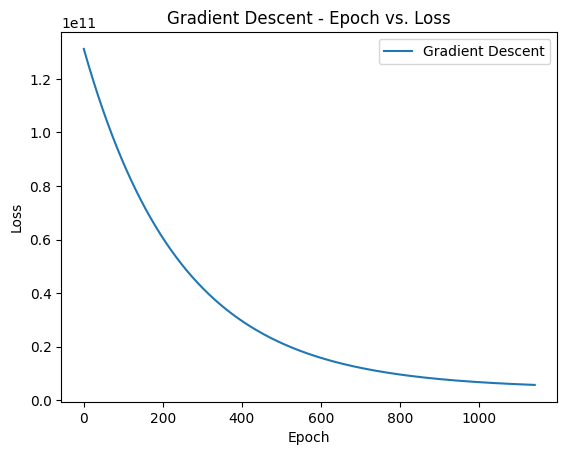

In [88]:
# Plot the loss vs. epoch graph for gradient descent
plot_loss_vs_epoch(loss_history_gd, 'Gradient Descent')


In [100]:
w_0 = 1
w_1 = 1
w_2 = 1
learning_rate = 0.05
loss_history_gd = []
w0, w1, w2 = batch_gradient_descent(norm_X0, norm_X1, Y, w_0, w_1, w_2, learning_rate)
print(f"Final weights: w0={w0}, w1={w1}, w2={w2}")


Epoch 0, Loss: 131182094445.80516
Epoch 59, Loss: 4101658096.8193235
Converged! 
Final weights: w0=339800.9363160018, w1=-2681.701040627994, w2=105547.2259048695


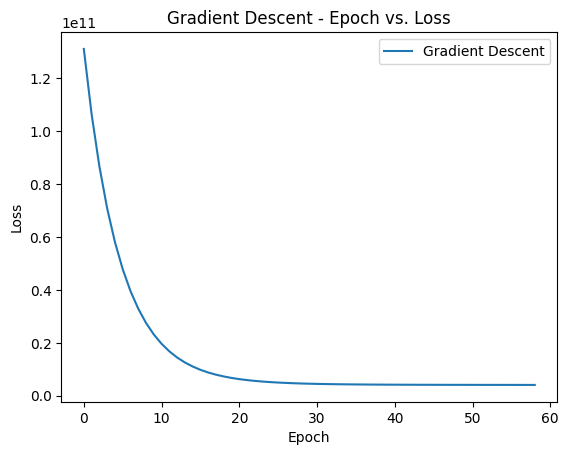

In [101]:
# Plot the loss vs. epoch graph for gradient descent
plot_loss_vs_epoch(loss_history_gd, 'Gradient Descent')


###Error calculation:

In [70]:
Y - (w0 + w1*norm_X1 + w2*norm_X0)

array([  45622.21562945,   43283.91070381,  -25015.60528724,
        -33476.30018054,   68896.85728176,  -34840.0068046 ,
         37144.37077307,  -64391.94396313,  -45081.22239866,
        -29885.65342738,  -88699.7840301 ,    6684.15270828,
          4450.58615705,   34038.35105059,   17854.70984009,
         72871.43377392,   47311.64173839,  -37849.30952027,
         81486.37072238,  123835.12603711,  -56135.73825933,
        -73842.01461526,  -44253.08687615,  -71752.27071986,
        -20147.20382056,   30408.60819821,  196947.32479222,
         58068.97094417,  107834.27371052, -125932.71189959,
         27636.2057392 ,  -43290.65142748,  -27223.72352899,
         86942.59060601,  -25480.61207655,  -14833.43791302,
         -8252.05770524,   -9474.66786796,  -85116.15762964,
        -71502.14971762,   69729.84986224,  -42367.20329905,
        -98873.15468809,   66083.66869933,   -9859.64140685,
        -16984.83727109,    6180.92051436])

## Stochastic Gradient Descent:

In [84]:
# Define SGD function
def sgd_one_sample(X0, X1, Y, w0, w1, w2, learning_rate, epochs=6000, tol=0.1, consecutive_instances=10):
    n = len(X0)
    prev_loss = 0
    count = 0

    for epoch in range(epochs):
        # shuffling the list of index randomly
        index_list = list(range(0,n))
        random.shuffle(index_list)
        for random_index in index_list:
            x0_i = X0[random_index]
            x1_i = X1[random_index]
            y_i = Y[random_index]

            # Calculate prediction and loss for the selected point
            prediction = w0 + w1 * x1_i + w2 * x0_i
            loss = (y_i - prediction)**2

            # Calculate gradients
            gradient_w0 = -2 * (y_i - prediction)
            gradient_w1 = -2 * (y_i - prediction) * x1_i
            gradient_w2 = -2 * (y_i - prediction) * x0_i

            # Update weights
            w0 -= learning_rate * gradient_w0
            w1 -= learning_rate * gradient_w1
            w2 -= learning_rate * gradient_w2

        # Calculate overall loss for monitoring
        predictions = w0 + w1 * X1 + w2 * X0
        overall_loss = np.mean((Y - predictions)**2)

        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
          count += 1
        else:
          count = 0

        # Print loss for monitoring
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged! ")
            break

        # Append loss to the history
        loss_history_sgd_one_sample.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1, w2

In [91]:
# Run SGD with one training sample at a time
w_0 = 1
w_1 = 1
w_2 = 1
learning_rate = 0.0001
loss_history_sgd_one_sample = []
w0_sgd_one_sample, w1_sgd_one_sample, w2_sgd_one_sample = sgd_one_sample(norm_X0, norm_X1, Y, w_0, w_1, w_2, learning_rate)
print(f"Final weights for SGD with one sample: w0={w0_sgd_one_sample}, w1={w1_sgd_one_sample}, w2={w2_sgd_one_sample}")

Epoch 0, Loss: 128760351453.9518
Epoch 358, Loss: 4373871186.74675
Converged! 
Final weights for SGD with one sample: w0=328774.29973763134, w1=6288.305466666933, w2=96060.70340181299


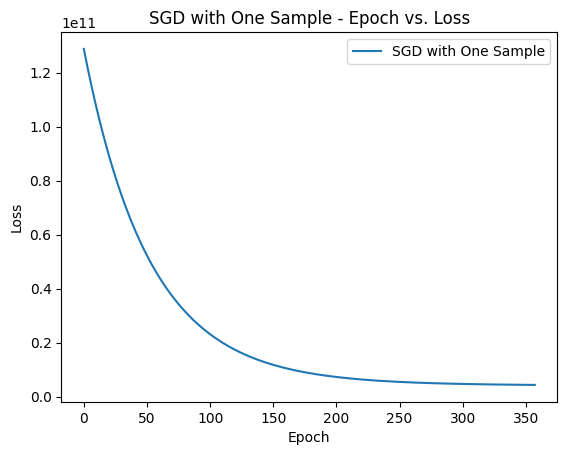

In [92]:
# Plot the loss vs. epoch graph for SGD with one sample
plot_loss_vs_epoch(loss_history_sgd_one_sample, 'SGD with One Sample')

In [105]:
# Run SGD with one training sample at a time
w_0 = 1
w_1 = 1
w_2 = 1
learning_rate = 0.05
loss_history_sgd_one_sample = []
w0_sgd_one_sample, w1_sgd_one_sample, w2_sgd_one_sample = sgd_one_sample(norm_X0, norm_X1, Y, w_0, w_1, w_2, learning_rate)
print(f"Final weights for SGD with one sample: w0={w0_sgd_one_sample}, w1={w1_sgd_one_sample}, w2={w2_sgd_one_sample}")

Epoch 0, Loss: 4982501356.179703
Epoch 500, Loss: 4433466448.425919
Epoch 1000, Loss: 6750741185.219884
Epoch 1500, Loss: 4319762129.302305
Epoch 2000, Loss: 4220798175.249495
Epoch 2500, Loss: 5144200101.631323
Epoch 3000, Loss: 4120133186.5624037
Epoch 3500, Loss: 5114398466.53162
Epoch 4000, Loss: 4329593669.18984
Epoch 4500, Loss: 4739304401.744841
Epoch 5000, Loss: 4172745215.167733
Epoch 5500, Loss: 4671315357.054835
Final weights for SGD with one sample: w0=322104.0354203624, w1=2671.867113344837, w2=116807.99408272866


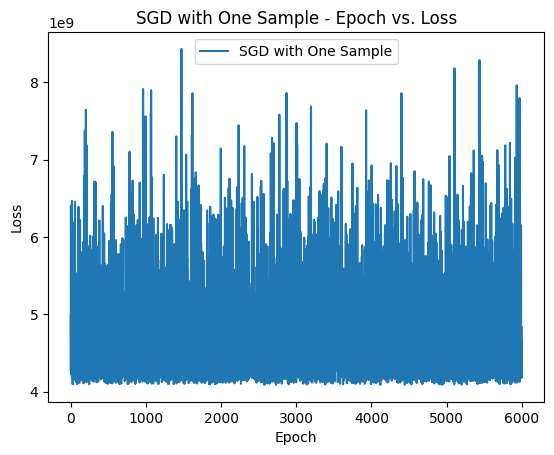

In [106]:
# Plot the loss vs. epoch graph for SGD with one sample
plot_loss_vs_epoch(loss_history_sgd_one_sample, 'SGD with One Sample')

## Mini Batch Gradient Descent Algorithm

In [139]:
# Define SGD with batches function
def mini_batch_gd(X0, X1, Y, w0, w1, w2, learning_rate, batch_size=10, epochs=7000, tol=0.1, consecutive_instances=10):
    n = len(X0)
    prev_loss = 0
    count = 0

    for epoch in range(epochs):
        # Shuffle the data indices
        indices = np.arange(n)
        np.random.shuffle(indices)
        batch_indices = np.arange(0, n, batch_size)
        np.random.shuffle(batch_indices)

        # Iterate through batches
        for i in batch_indices:
            batch_indices = indices[i:i+batch_size]
            x0_batch = X0[batch_indices]
            x1_batch = X1[batch_indices]
            y_batch = Y[batch_indices]

            # Calculate predictions and loss for the batch
            predictions = w0 + w1 * x1_batch + w2 * x0_batch
            loss = np.mean((y_batch - predictions)**2)

            # Calculate gradients
            gradient_w0 = -2 * np.mean(y_batch - predictions)
            gradient_w1 = -2 * np.mean((y_batch - predictions) * x1_batch)
            gradient_w2 = -2 * np.mean((y_batch - predictions) * x0_batch)

            # Update weights
            w0 -= learning_rate * gradient_w0
            w1 -= learning_rate * gradient_w1
            w2 -= learning_rate * gradient_w2

        # Calculate overall loss for monitoring
        predictions = w0 + w1 * X1 + w2 * X0
        overall_loss = np.mean((Y - predictions)**2)

        # Stopping criteria
        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
          count += 1
        else:
          count = 0

        # Print loss for monitoring
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged! ")
            break

        # Append loss to the history
        loss_history_mini_batch_gd.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1, w2


In [143]:
# Run SGD with batches of 10 samples
w_0 = 1
w_1 = 1
w_2 = 1
learning_rate = 0.0001
loss_history_mini_batch_gd = []
w0_mini_batch_gd, w1_mini_batch_gd, w2_mini_batch_gd = mini_batch_gd(norm_X0, norm_X1, Y, w_0, w_1, w_2, learning_rate)
print(f"Final weights for Mini Batch Gradient Descent: w0={w0_mini_batch_gd}, w1={w1_mini_batch_gd}, w2={w2_mini_batch_gd}")

Epoch 0, Loss: 130917001109.87994
Epoch 500, Loss: 50273292306.99922
Epoch 1000, Loss: 21313433697.07102
Epoch 1500, Loss: 10704880595.472664
Epoch 1711, Loss: 8554893527.581933
Converged! 
Final weights for Mini Batch Gradient Descent: w0=278977.5398980061, w1=17172.74408506775, w2=78631.38367307262


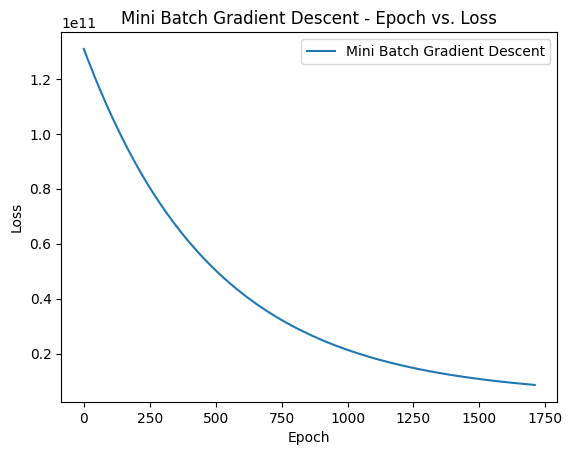

In [144]:
# Plot the loss vs. epoch graph for SGD with batches
plot_loss_vs_epoch(loss_history_mini_batch_gd, 'Mini Batch Gradient Descent')

In [147]:
# Run SGD with batches of 10 samples
w_0 = 1
w_1 = 1
w_2 = 1
learning_rate = 0.05
loss_history_sgd_batches = []
w0_mini_batch_gd, w1_mini_batch_gd, w2_mini_batch_gd = mini_batch_gd(norm_X0, norm_X1, Y, w_0, w_1, w_2, learning_rate)
print(f"Final weights for Mini Batch Gradient Descent: w0={w0_mini_batch_gd}, w1={w1_mini_batch_gd}, w2={w2_mini_batch_gd}")

Epoch 0, Loss: 48077821013.46387
Epoch 82, Loss: 4089564837.460674
Converged! 
Final weights for Mini Batch Gradient Descent: w0=341397.37021207786, w1=-6248.340654572778, w2=107862.88440917652


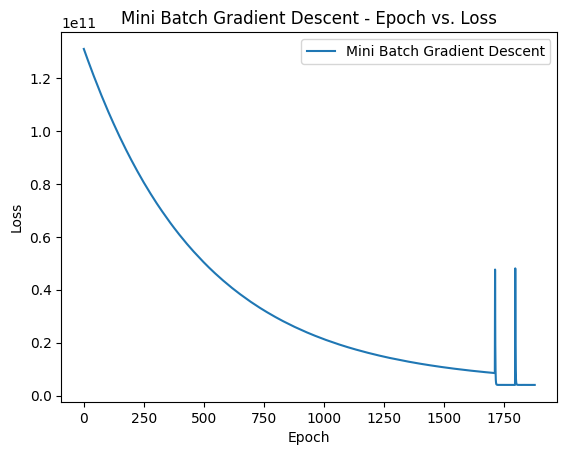

In [148]:
# Plot the loss vs. epoch graph for SGD with batches
plot_loss_vs_epoch(loss_history_mini_batch_gd, 'Mini Batch Gradient Descent')